In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

low_memory = False

# Read csv into pandas dataframe
df = pd.read_csv('train.csv')

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Filter data to show yards gained on each play
yards = df.groupby('PlayId').max()[['Yards']]
yards.head()

,Yards
PlayId,
20170907000118,8
20170907000139,3
20170907000189,5
20170907000345,2
20170907000395,7


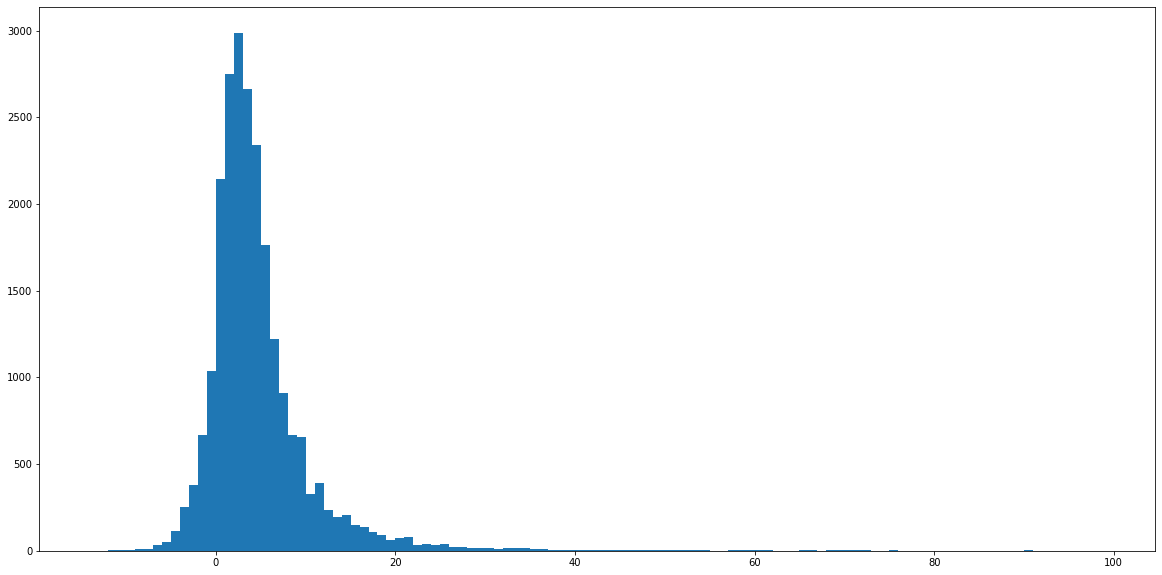

In [18]:
# Build Histogram/Probability Distribution Of Yards gained on each play
plt.figure(figsize=(20,10))
plt.hist(yards['Yards'], bins=range(min(yards['Yards']), max(yards['Yards']) + 1, 1))
plt.show()